<a href="https://colab.research.google.com/github/BenzThitikorn/Vector-Symbol-Decoding-with-AI/blob/main/Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#!git clone https://github.com/BenzThitikorn/Vector-Symbol-Decoding-with-AI.git
#!pip install --upgrade pyldpc


In [160]:
import torch
import numpy as np
from scipy.sparse import random as sparse_random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using {} device".format(device))

Using cpu device


In [161]:
from pyldpc import make_ldpc

d_v = 3  # Variable node degree
d_c = 6  # Check node degree

n = 30 #Code lenght
r = 16 #Symbol lenght

# Generate parity check matrix (H) and generator matrix (G)
H, Gt = make_ldpc(n, d_v=d_v, d_c=d_c, systematic=True, sparse=True, seed=1)
G = Gt.T  # Transpose of Gt to get G
j = G.shape[0]  # Number of rows in G

print(f"H matrix: {H.shape[0]} rows, {H.shape[1]} columns")
print(f"G matrix: {G.shape[0]} rows, {G.shape[1]} columns")

H matrix: 15 rows, 30 columns
G matrix: 17 rows, 30 columns


In [19]:
cd /content/Vector-Symbol-Decoding-with-AI/Function


/content/Vector-Symbol-Decoding-with-AI/Function


In [178]:
import Channel_Coding as cc
import numpy as np
from CCv2 import Compute_Gauss_Jordan_Reduction_Optimized, VSD_normal_get0fast

def q_ary_error_channel(prob_error,num):
	rng = np.random.default_rng()
	Probability = [1-prob_error, prob_error]
	channel = rng.choice(2, num, p=Probability)
	return channel

def VSD_normal(H, Y):
    Y_Binary = np.array(Y, dtype=int)

    # Compute Syndrome Matrix
    S_Binary = np.floor(np.mod(np.dot(H, Y_Binary), 2)).astype(int)
    S_Gauss, S_rank, Index_Rows = cc.Compute_Gauss_Jordan_Reduction(S_Binary)

    # Compute Error Locating Vector
    Error_Locating_Vector = cc.Compute_Error_Locating_Vector(S_Gauss, Index_Rows, H)

    # Find Number of Erroneous Symbols
    Number_Error = np.count_nonzero(Error_Locating_Vector == 0)

    if Number_Error == 0:
        return Y, 1  # No errors detected

    # Check if Rank of S matches Number of Erroneous Symbols
    if S_rank == Number_Error:
        S_Sub = S_Binary[Index_Rows, :]
        Position_Error = np.where(Error_Locating_Vector == 0)[0]
        H_Sub = H[np.ix_(Index_Rows, Position_Error)]

        # Check if H_Sub is invertible
        if np.linalg.det(H_Sub) == 0:
            #print("normal",H_Sub)
            return Y_Binary, 0  # Cannot correct errors

        H_Sub_inv = np.linalg.inv(H_Sub)
        Error_Binary = np.floor(np.mod(np.dot(H_Sub_inv, S_Sub), 2)).astype(int)

        # Correct the errors
        for index in range(len(Position_Error)):
            Y_Binary[Position_Error[index]] ^= Error_Binary[index]

        Y_decode = Y_Binary  # Decoded output
        #print(H_Sub)
        return Y_decode, 1  # Successful correction
    else:
        return Y_Binary, 0  # Unable to correct errors


def VSD_ai(H, Y):
    Y_Binary = np.array(Y, dtype=int)

    # Compute Syndrome Matrix
    S_Binary = np.floor(np.mod(np.dot(H, Y_Binary), 2)).astype(int)
    S_Gauss, S_rank, Index_Rows = cc.Compute_Gauss_Jordan_Reduction(S_Binary)

    # Ensure `sigma_predict_np` is properly defined before using it
    if 'sigma' not in globals():
        return Y, 0  # Error: `sigma_predict_np` is missing

    # Compute Error Locating Vector
    Error_Locating_Vector = sigma

    # Find Number of Erroneous Symbols
    Number_Error = np.count_nonzero(Error_Locating_Vector == 0)

    if Number_Error == 0:
        return Y, 1  # No errors detected

    # Check if Rank of S matches Number of Erroneous Symbols
    if S_rank == Number_Error:
        S_Sub = S_Binary[Index_Rows, :]
        Position_Error = np.where(Error_Locating_Vector == 0)[0]
        H_Sub = H[np.ix_(Index_Rows, Position_Error)]

        # Check if H_Sub is invertible
        if np.linalg.det(H_Sub) == 0:
            #print("ai",H_Sub)
            return Y, 0  # Cannot correct errors

        H_Sub_inv = np.linalg.inv(H_Sub)
        Error_Binary = np.floor(np.mod(np.dot(H_Sub_inv, S_Sub), 2)).astype(int)

        # Correct the errors
        for index in range(len(Position_Error)):
            Y_Binary[Position_Error[index]] ^= Error_Binary[index]

        Y_decode = Y_Binary  # Decoded output
        return Y_decode, 1  # Successful correction
    else:
        return Y, 0  # Unable to correct errors

def VSD_combined(H, Y):
    result_normal = VSD_normal(H, Y)

    # If VSD_normal fails (error correction unsuccessful), try VSD_ai
    if result_normal[1] == 0:
        return VSD_ai(H, Y)

    return result_normal  # Return the successful result from VSD_normal

In [190]:

def q_ary_error_channel(prob_error,num):
	rng = np.random.default_rng()
	Probability = [1-prob_error, prob_error]
	channel = rng.choice(2, num, p=Probability)
	return channel

def VSD_normal_op(H, Y):
    Y_Binary = np.array(Y, dtype=int)

    # Compute Syndrome Matrix
    S_Binary = np.floor(np.mod(np.dot(H, Y_Binary), 2)).astype(int)
    S_Gauss, S_rank, Index_Rows = Compute_Gauss_Jordan_Reduction_Optimized(S_Binary)

    # Compute Error Locating Vector
    Error_Locating_Vector = cc.Compute_Error_Locating_Vector(S_Gauss, Index_Rows, H)

    # Find Number of Erroneous Symbols
    Number_Error = np.count_nonzero(Error_Locating_Vector == 0)

    if Number_Error == 0:
        return Y, 1  # No errors detected

    # Check if Rank of S matches Number of Erroneous Symbols
    if S_rank == Number_Error:
        S_Sub = S_Binary[Index_Rows, :]
        Position_Error = np.where(Error_Locating_Vector == 0)[0]
        H_Sub = H[np.ix_(Index_Rows, Position_Error)]

        # Check if H_Sub is invertible
        if np.linalg.det(H_Sub) == 0:
            #print("normal",H_Sub)
            return Y_Binary, 0  # Cannot correct errors

        H_Sub_inv = np.linalg.inv(H_Sub)
        Error_Binary = np.floor(np.mod(np.dot(H_Sub_inv, S_Sub), 2)).astype(int)

        # Correct the errors
        for index in range(len(Position_Error)):
            Y_Binary[Position_Error[index]] ^= Error_Binary[index]

        Y_decode = Y_Binary  # Decoded output
        #print(H_Sub)
        return Y_decode, 1  # Successful correction
    else:
        return Y_Binary, 0  # Unable to correct errors


def VSD_ai_op(H, Y):
    Y_Binary = np.array(Y, dtype=int)

    # Compute Syndrome Matrix
    S_Binary = np.floor(np.mod(np.dot(H, Y_Binary), 2)).astype(int)
    S_Gauss, S_rank, Index_Rows = Compute_Gauss_Jordan_Reduction_Optimized(S_Binary)

    # Ensure `sigma_predict_np` is properly defined before using it
    if 'sigma' not in globals():
        return Y, 0  # Error: `sigma_predict_np` is missing

    # Compute Error Locating Vector
    Error_Locating_Vector = sigma

    # Find Number of Erroneous Symbols
    Number_Error = np.count_nonzero(Error_Locating_Vector == 0)

    if Number_Error == 0:
        return Y, 1  # No errors detected

    # Check if Rank of S matches Number of Erroneous Symbols
    if S_rank == Number_Error:
        S_Sub = S_Binary[Index_Rows, :]
        Position_Error = np.where(Error_Locating_Vector == 0)[0]
        H_Sub = H[np.ix_(Index_Rows, Position_Error)]

        # Check if H_Sub is invertible
        if np.linalg.det(H_Sub) == 0:
            #print("ai",H_Sub)
            return Y, 0  # Cannot correct errors

        H_Sub_inv = np.linalg.inv(H_Sub)
        Error_Binary = np.floor(np.mod(np.dot(H_Sub_inv, S_Sub), 2)).astype(int)

        # Correct the errors
        for index in range(len(Position_Error)):
            Y_Binary[Position_Error[index]] ^= Error_Binary[index]

        Y_decode = Y_Binary  # Decoded output
        return Y_decode, 1  # Successful correction
    else:
        return Y, 0  # Unable to correct errors

def VSD_combined_op(H, Y):
    result_normal = VSD_normal_op(H, Y)

    # If VSD_normal fails (error correction unsuccessful), try VSD_ai
    if result_normal[1] == 0:
        return VSD_ai_op(H, Y)

    return result_normal  # Return the successful result from VSD_normal

In [212]:
input_size = H.shape[0]*r
output_size = H.shape[1]
import torch
import torch.nn as nn
mlp_deep1 = torch.nn.Sequential(
    nn.Linear(input_size, 2048),  # Increase layer size
    nn.Sigmoid(),
    nn.BatchNorm1d(2048),
    #nn.Dropout(0.3),  # Add dropout
    nn.Linear(2048, 1024),
    nn.PReLU(),
    nn.BatchNorm1d(1024),
    #nn.Dropout(0.3),
    nn.Linear(1024, 1024),
    nn.PReLU(),
    nn.BatchNorm1d(1024),
    #nn.Dropout(0.3),
    nn.Linear(1024, 512),
    nn.PReLU(),
    nn.BatchNorm1d(512),
    #nn.Dropout(0.3),
    nn.Linear(512, output_size),
).to(device)
model = mlp_deep
#model.load_state_dict(torch.load('/content/drive/MyDrive/VSD + AI/Model/mlp_deep_withdecodeable.pth', map_location=device))
model.load_state_dict(torch.load('/content/drive/MyDrive/VSD + AI/Model/Model(Nondecode30%)/mlp_deep_nondecodeonly.pth', map_location=device))


model.to(device)
model.eval()

Sequential(
  (0): Linear(in_features=240, out_features=2048, bias=True)
  (1): Sigmoid()
  (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=2048, out_features=1024, bias=True)
  (4): PReLU(num_parameters=1)
  (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=1024, out_features=1024, bias=True)
  (7): PReLU(num_parameters=1)
  (8): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Linear(in_features=1024, out_features=512, bias=True)
  (10): PReLU(num_parameters=1)
  (11): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Linear(in_features=512, out_features=30, bias=True)
)

In [199]:
r = 16
SER = 0.1
num = 1000
total_count_VSD_normal = 0
total_count_VSD_ai = 0
total_count_VSD_combined = 0
for i in range(num):
    error_positions = q_ary_error_channel(SER, n)  # Generate error positions
    message = np.random.randint(0, 2, (r, j))  # Generate a random message
    codeword = np.matmul(message, G).astype(np.int8) % 2  # Encode the message
    error = np.zeros_like(codeword)  # Initialize error vector
    error[:, error_positions == 1] = sparse_random(r, np.sum(error_positions), density=0.5, format='csr', dtype=int).toarray() % 2  # Introduce errors
    Y = (codeword + error) % 2  # Received codeword
    Syndrome = np.dot(H,Y.T)%2
    Syndrome = torch.tensor(Syndrome, dtype=torch.float16).to(device)
    S = Syndrome.reshape(1, input_size).type(torch.float16).to(device)

    model.eval()  # Disable dropout and batch norm for inference
    model.type(torch.float16)
    with torch.no_grad():  # Disable gradient calculation
        y_pred = model(S)
        error_predict = (y_pred > 0.5).int()
        error_predict = error_predict.cpu().detach().numpy().reshape(-1)
        sigma = (error_predict+1)%2
        #sigma = error_predict
    #all(error_predict==error_positions) # This line seems to serve no purpose
    Y=Y.T
    if VSD_normal(H, Y)[1] == 1: # Corrected indentation
        total_count_VSD_normal += 1
    if VSD_ai(H, Y)[1] == 1: # Corrected indentation
        total_count_VSD_ai += 1
    if VSD_combined(H, Y)[1] == 1: # Corrected indentation
        total_count_VSD_combined += 1

# Print final count
print("Final count VSD normal:", total_count_VSD_normal,"from", num, "times")
print("Final count VSD with ai:", total_count_VSD_ai, "from", num, "times")
print("Final count VSD combined:", total_count_VSD_combined, "from", num, "times")

Final count VSD normal: 747 from 1000 times
Final count VSD with ai: 885 from 1000 times
Final count VSD combined: 946 from 1000 times


Completed 100/1000 iterations
Completed 200/1000 iterations
Completed 300/1000 iterations
Completed 400/1000 iterations
Completed 500/1000 iterations
Completed 600/1000 iterations
Completed 700/1000 iterations
Completed 800/1000 iterations
Completed 900/1000 iterations


Completed 1000/1000 iterations
Final count VSD normal: 772 from 1000 times (77.20%)
Final count VSD with ai: 883 from 1000 times (88.30%)
Final count VSD combined: 940 from 1000 times (94.00%)

Average execution time VSD normal: 0.000725 seconds
Average execution time VSD with ai: 0.000511 seconds
Average execution time VSD combined: 0.000764 seconds


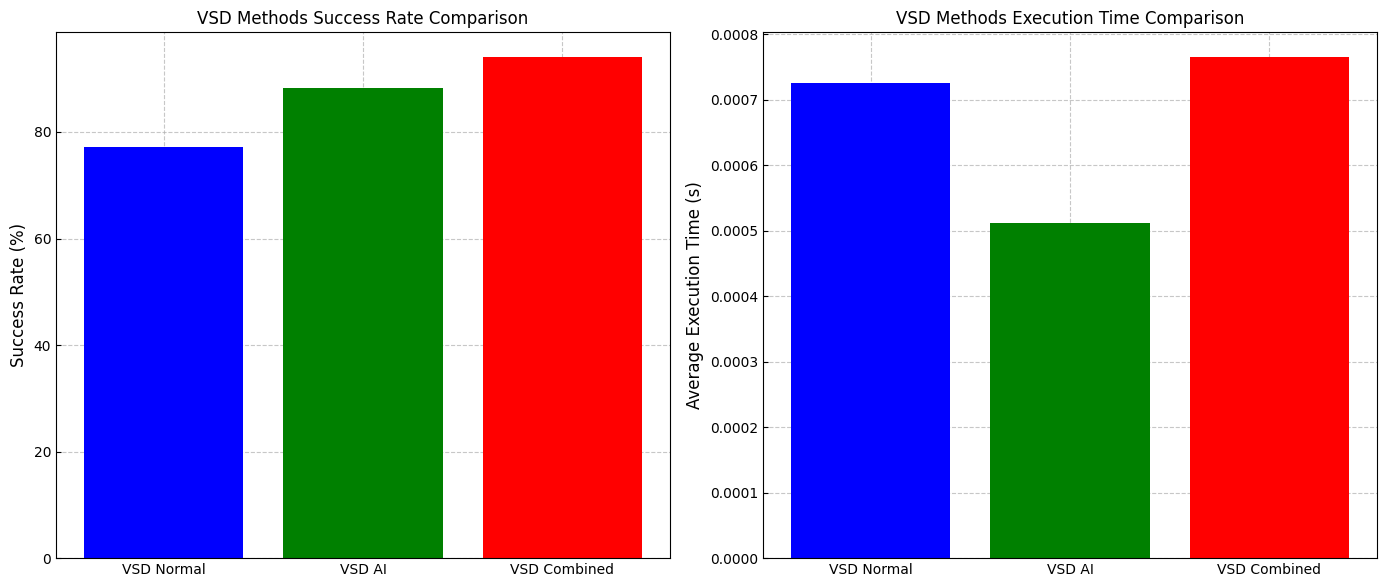

In [203]:
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random

# Assuming these functions are defined elsewhere
# from your_module import VSD_normal, VSD_ai, VSD_combined, q_ary_error_channel

# Parameters
r = 16
SER = 0.1
num = 1000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize timing and count variables
times_VSD_normal = []
times_VSD_ai = []
times_VSD_combined = []
total_count_VSD_normal = 0
total_count_VSD_ai = 0
total_count_VSD_combined = 0


# Run the experiment
for i in range(num):
    # Generate error positions
    error_positions = q_ary_error_channel(SER, n)

    # Generate a random message
    message = np.random.randint(0, 2, (r, j))

    # Encode the message
    codeword = np.matmul(message, G).astype(np.int8) % 2

    # Initialize error vector
    error = np.zeros_like(codeword)

    # Introduce errors
    if np.sum(error_positions) > 0:
        error[:, error_positions == 1] = sparse_random(r, np.sum(error_positions),
                                                      density=0.5, format='csr',
                                                      dtype=int).toarray() % 2

    # Received codeword
    Y = (codeword + error) % 2

    # Calculate syndrome
    Syndrome = np.dot(H, Y.T) % 2
    Syndrome = torch.tensor(Syndrome, dtype=torch.float16).to(device)
    S = Syndrome.reshape(1, input_size).type(torch.float16).to(device)

    # Model prediction
    model.eval()  # Disable dropout and batch norm for inference
    model.type(torch.float16)
    with torch.no_grad():  # Disable gradient calculation
        y_pred = model(S)
        error_predict = (y_pred > 0.5).int()
        error_predict = error_predict.cpu().detach().numpy().reshape(-1)

    sigma = error_predict^1
    Y = Y.T  # Transpose Y for consistency with VSD functions

    # Measure VSD_normal time and success
    start_time = time.time()
    result_normal, success_normal = VSD_normal(H, Y)
    end_time = time.time()
    times_VSD_normal.append(end_time - start_time)
    if success_normal == 1:
        total_count_VSD_normal += 1

    # Measure VSD_ai time and success
    start_time = time.time()
    result_ai, success_ai = VSD_ai(H, Y)
    end_time = time.time()
    times_VSD_ai.append(end_time - start_time)
    if success_ai == 1:
        total_count_VSD_ai += 1

    # Measure VSD_combined time and success
    start_time = time.time()
    result_combined, success_combined = VSD_combined(H, Y)
    end_time = time.time()
    times_VSD_combined.append(end_time - start_time)
    if success_combined == 1:
        total_count_VSD_combined += 1

    # Print progress every 100 iterations
    if (i + 1) % 100 == 0:
        print(f"Completed {i + 1}/{num} iterations")

# Print final counts
print(f"Final count VSD normal: {total_count_VSD_normal} from {num} times ({total_count_VSD_normal/num*100:.2f}%)")
print(f"Final count VSD with ai: {total_count_VSD_ai} from {num} times ({total_count_VSD_ai/num*100:.2f}%)")
print(f"Final count VSD combined: {total_count_VSD_combined} from {num} times ({total_count_VSD_combined/num*100:.2f}%)")

# Print average times
avg_time_normal = sum(times_VSD_normal) / len(times_VSD_normal)
avg_time_ai = sum(times_VSD_ai) / len(times_VSD_ai)
avg_time_combined = sum(times_VSD_combined) / len(times_VSD_combined)

print(f"\nAverage execution time VSD normal: {avg_time_normal:.6f} seconds")
print(f"Average execution time VSD with ai: {avg_time_ai:.6f} seconds")
print(f"Average execution time VSD combined: {avg_time_combined:.6f} seconds")

# Plot results
methods = ['VSD Normal', 'VSD AI', 'VSD Combined']
success_rates = [total_count_VSD_normal/num*100, total_count_VSD_ai/num*100, total_count_VSD_combined/num*100]
avg_times = [avg_time_normal, avg_time_ai, avg_time_combined]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Success rate plot
ax1.bar(methods, success_rates, color=['blue', 'green', 'red'])
ax1.set_ylabel('Success Rate (%)')
ax1.set_title('VSD Methods Success Rate Comparison')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Execution time plot
ax2.bar(methods, avg_times, color=['blue', 'green', 'red'])
ax2.set_ylabel('Average Execution Time (s)')
ax2.set_title('VSD Methods Execution Time Comparison')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('vsd_comparison.png')
plt.show()

Completed 100/1000 iterations
Completed 200/1000 iterations
Completed 300/1000 iterations
Completed 400/1000 iterations
Completed 500/1000 iterations
Completed 600/1000 iterations
Completed 700/1000 iterations
Completed 800/1000 iterations
Completed 900/1000 iterations


Completed 1000/1000 iterations
Final count VSD normal: 767 from 1000 times (76.70%)
Final count VSD with ai: 706 from 1000 times (70.60%)
Final count VSD combined: 899 from 1000 times (89.90%)

Average execution time VSD normal: 0.001099 seconds
Average execution time VSD with ai: 0.000774 seconds
Average execution time VSD combined: 0.001172 seconds


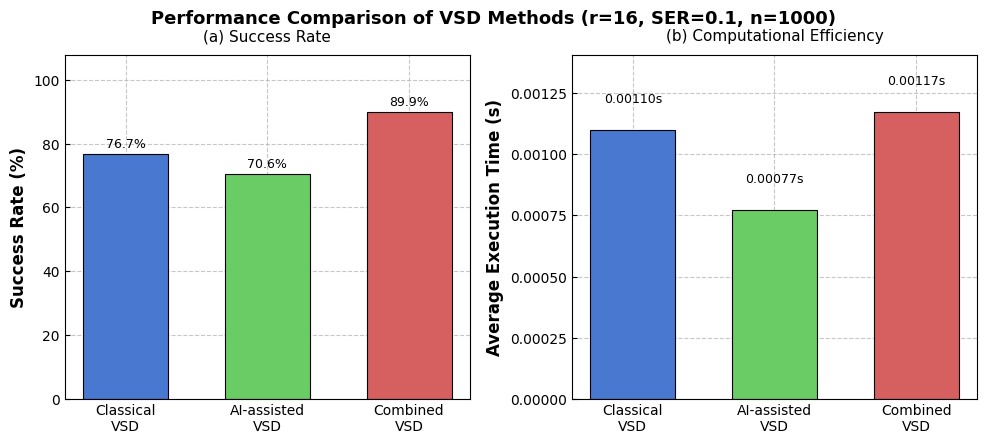


Statistical Summary:
--------------------------------------------------
Success Rate Improvement:
AI-assisted vs Classical: -7.95%
Combined vs Classical: 17.21%
Combined vs AI-assisted: 27.34%

Execution Time Comparison:
AI-assisted vs Classical: 0.70x
Combined vs Classical: 1.07x
Combined vs AI-assisted: 1.52x


In [213]:
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl



# Assuming these functions are defined elsewhere
# from your_module import VSD_normal, VSD_ai, VSD_combined, q_ary_error_channel

# Parameters
r = 16
SER = 0.1
num = 1000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize timing and count variables
times_VSD_normal = []
times_VSD_ai = []
times_VSD_combined = []
total_count_VSD_normal = 0
total_count_VSD_ai = 0
total_count_VSD_combined = 0

# Run the experiment
for i in range(num):
    # Generate error positions
    error_positions = q_ary_error_channel(SER, n)

    # Generate a random message
    message = np.random.randint(0, 2, (r, j))

    # Encode the message
    codeword = np.matmul(message, G).astype(np.int8) % 2

    # Initialize error vector
    error = np.zeros_like(codeword)

    # Introduce errors
    if np.sum(error_positions) > 0:
        error[:, error_positions == 1] = sparse_random(r, np.sum(error_positions),
                                                      density=0.5, format='csr',
                                                      dtype=int).toarray() % 2

    # Received codeword
    Y = (codeword + error) % 2

    # Calculate syndrome
    Syndrome = np.dot(H, Y.T) % 2
    Syndrome = torch.tensor(Syndrome, dtype=torch.float16).to(device)
    S = Syndrome.reshape(1, input_size).type(torch.float16).to(device)

    # Model prediction
    model.eval()  # Disable dropout and batch norm for inference
    model.type(torch.float16)
    with torch.no_grad():  # Disable gradient calculation
        y_pred = model(S)
        error_predict = (y_pred > 0.5).int()
        error_predict = error_predict.cpu().detach().numpy().reshape(-1)

    sigma = error_predict
    Y = Y.T  # Transpose Y for consistency with VSD functions

    # Measure VSD_normal time and success
    start_time = time.time()
    result_normal, success_normal = VSD_normal(H, Y)
    end_time = time.time()
    times_VSD_normal.append(end_time - start_time)
    if success_normal == 1:
        total_count_VSD_normal += 1

    # Measure VSD_ai time and success
    start_time = time.time()
    result_ai, success_ai = VSD_ai(H, Y)
    end_time = time.time()
    times_VSD_ai.append(end_time - start_time)
    if success_ai == 1:
        total_count_VSD_ai += 1

    # Measure VSD_combined time and success
    start_time = time.time()
    result_combined, success_combined = VSD_combined(H, Y)
    end_time = time.time()
    times_VSD_combined.append(end_time - start_time)
    if success_combined == 1:
        total_count_VSD_combined += 1

    # Print progress every 100 iterations
    if (i + 1) % 100 == 0:
        print(f"Completed {i + 1}/{num} iterations")

# Print final counts
print(f"Final count VSD normal: {total_count_VSD_normal} from {num} times ({total_count_VSD_normal/num*100:.2f}%)")
print(f"Final count VSD with ai: {total_count_VSD_ai} from {num} times ({total_count_VSD_ai/num*100:.2f}%)")
print(f"Final count VSD combined: {total_count_VSD_combined} from {num} times ({total_count_VSD_combined/num*100:.2f}%)")

# Print average times
avg_time_normal = sum(times_VSD_normal) / len(times_VSD_normal)
avg_time_ai = sum(times_VSD_ai) / len(times_VSD_ai)
avg_time_combined = sum(times_VSD_combined) / len(times_VSD_combined)

print(f"\nAverage execution time VSD normal: {avg_time_normal:.6f} seconds")
print(f"Average execution time VSD with ai: {avg_time_ai:.6f} seconds")
print(f"Average execution time VSD combined: {avg_time_combined:.6f} seconds")

# Plot results
methods = ['Classical\nVSD', 'AI-assisted\nVSD', 'Combined\nVSD']
success_rates = [total_count_VSD_normal/num*100, total_count_VSD_ai/num*100, total_count_VSD_combined/num*100]
avg_times = [avg_time_normal, avg_time_ai, avg_time_combined]

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))

# Color palette for academic plots (muted colors)
colors = ['#4878D0', '#6ACC65', '#D65F5F']

# Success rate plot (left subplot)
bars1 = ax1.bar(methods, success_rates, color=colors, width=0.6, edgecolor='black', linewidth=0.8)
ax1.set_ylabel('Success Rate (%)', fontweight='bold')
ax1.set_ylim(0, max(success_rates) * 1.2)  # Give some headroom
ax1.yaxis.set_major_locator(MaxNLocator(nbins=6, integer=True))

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Execution time plot (right subplot)
bars2 = ax2.bar(methods, avg_times, color=colors, width=0.6, edgecolor='black', linewidth=0.8)
ax2.set_ylabel('Average Execution Time (s)', fontweight='bold')
ax2.set_ylim(0, max(avg_times) * 1.2)  # Give some headroom
ax2.yaxis.set_major_locator(MaxNLocator(nbins=6))

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.0001,
            f'{height:.5f}s', ha='center', va='bottom', fontsize=9)

# Add a common title
fig.suptitle(f'Performance Comparison of VSD Methods (r={r}, SER={SER}, n={num})',
             fontweight='bold', fontsize=13)

# Add subplot titles
ax1.set_title('(a) Success Rate', fontsize=11, pad=10)
ax2.set_title('(b) Computational Efficiency', fontsize=11, pad=10)

# Improve layout
plt.tight_layout()
fig.subplots_adjust(top=0.88)  # Adjust for main title

# Save figure in high resolution
plt.savefig('vsd_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('vsd_comparison.pdf', format='pdf', bbox_inches='tight')  # PDF for publication

plt.show()

# Additional statistical analysis
print("\nStatistical Summary:")
print("-" * 50)
print("Success Rate Improvement:")
print(f"AI-assisted vs Classical: {(total_count_VSD_ai - total_count_VSD_normal)/total_count_VSD_normal*100:.2f}%")
print(f"Combined vs Classical: {(total_count_VSD_combined - total_count_VSD_normal)/total_count_VSD_normal*100:.2f}%")
print(f"Combined vs AI-assisted: {(total_count_VSD_combined - total_count_VSD_ai)/total_count_VSD_ai*100:.2f}%")

print("\nExecution Time Comparison:")
print(f"AI-assisted vs Classical: {avg_time_ai/avg_time_normal:.2f}x")
print(f"Combined vs Classical: {avg_time_combined/avg_time_normal:.2f}x")
print(f"Combined vs AI-assisted: {avg_time_combined/avg_time_ai:.2f}x")